# Model and Cost Function : Linear Regression

## Model Representation

**x** : input / feature variables  
**y** : output target variables  
$(x^{(i)},y^{(i)})$ : Training example
List of $(x^{(i)},y^{(i)})$ :Training set. a list of **m** training examples  
**(i)** : index into training set

**GOAL :** Given a training set, learn a function $h : x \rightarrow y$, so that **h(x)** is a "good" predictor of the corresponding value of "y" 

**Regression :** Target variable is continuous  
**Classification :** Target variable is discrete

### Linear Regression Function

 $ h_\theta(x) = \theta_0 + \theta_1x $

with :  
$\theta_0 = intercept $  
$\theta_1 = slope$   (gradient)

**Ex 1 : Pandas modelisation of Fuel Consumption**

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")

# take a look at the dataset
df.head()


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Linear Regression Model

In [3]:
from sklearn import linear_model

lr = linear_model.LinearRegression()

x = np.asanyarray(df[['ENGINESIZE']])
y = np.asanyarray(df[['CO2EMISSIONS']])

lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Slope

In [4]:
lr.coef_

array([[39.12519979]])

Intercept

In [5]:
lr.intercept_

array([125.3040995])

Plot the output

Text(0, 0.5, 'Emission')

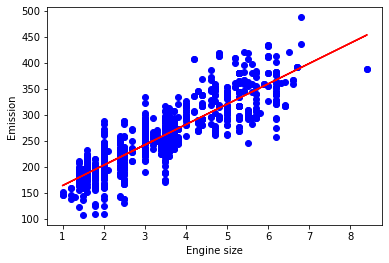

In [6]:
plt.scatter(df.ENGINESIZE,df.CO2EMISSIONS, color='blue')
plt.plot(x,lr.coef_[0][0]*x + lr.intercept_[0],'-r')

plt.xlabel("Engine size")
plt.ylabel("Emission")

**Ex 2 : Auto.csv**

Predict he miles per gallon **"mpg"** variable for several independent variables

In [9]:
import seaborn as sns

In [7]:
df = pd.read_csv("Auto.csv")

# take a look at the dataset
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [13]:
df.shape

(397, 9)

In [21]:
X = df['weight']
y = df['mpg']

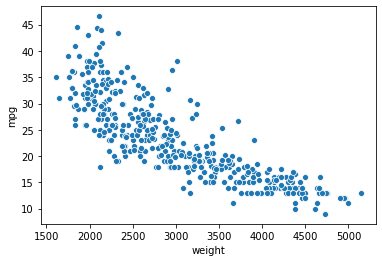

In [22]:
sns.scatterplot(X,y)

Reshaping the data

In [23]:
X = np.asanyarray(df[['weight']])
y = np.asanyarray(df[['mpg']])

Divide the variables into testing and training sets

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

Train the model

In [26]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Text(0, 0.5, 'MPG')

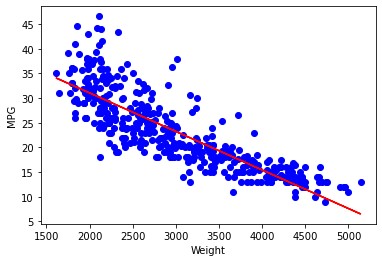

In [35]:
plt.scatter(df['weight'],df['mpg'], color='blue')
plt.plot(X_train,lr.coef_[0][0]*X_train + lr.intercept_[0],'-r')

plt.xlabel("Weight")
plt.ylabel("MPG")

Make prediction from the training

In [27]:
pred = lr.predict(X_test)

In [37]:
pred[:5]

array([[28.9873499 ],
       [31.13531909],
       [30.65886047],
       [28.88580954],
       [16.27918312]])